In [1]:
import pandas as pd
import numpy as np

In [2]:
from vega_datasets import data
data.sf_temps()
df = data.sf_temps()

In [3]:
##### Working through the lesson examples #########

In [4]:
#To convert an existing string value or values to a datetime type
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [5]:
#bring in a dataset for practice
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [6]:
#pd.to_datetime will work with entire columns at a time
# see how this changed the column date from object to datetime64
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [7]:
# format string to tell pandas explicitly how to convert this date
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [8]:
#we can use the strftime method and give date string to format the 
# date in a custom way 
df['year'] = df.date.dt.year # the df + col + dt + timeframe
df['month'] = df.date.dt.month
df['day'] = df.date.dt.month
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,1,Wednesday
2,2019-01-03,10.046015,2019,1,1,Thursday
3,2019-01-04,6.354805,2019,1,1,Friday
4,2019-01-07,8.545563,2019,1,1,Monday


In [9]:
# remove demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

In [10]:
# check that the above cleanup worked
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [11]:
# Once we have a date-time column on a dataframe, we can use that 
# column as the index on our dataframe
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [12]:
########## Exercise Start ###############

In [13]:
from vega_datasets import data
data.sf_temps()
df = data.sf_temps()

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [14]:
# df.resample('3W').mean() # Every 3 weeks
# this is a example of resampling

In [15]:
# this gives you a df resetting the index to date which has to
# happen first before resamlpling
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [16]:
# now I will upsample these by day and get the daily average
# using .plot I will plot the daily average over time
avg_by_day = df.temp.resample('D').mean()
avg_by_day

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
                ...    
2010-12-27    48.991667
2010-12-28    49.000000
2010-12-29    49.012500
2010-12-30    49.012500
2010-12-31    49.116667
Freq: D, Name: temp, Length: 365, dtype: float64

<AxesSubplot:xlabel='date'>

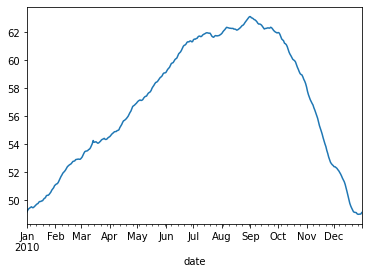

In [17]:
avg_by_day.plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

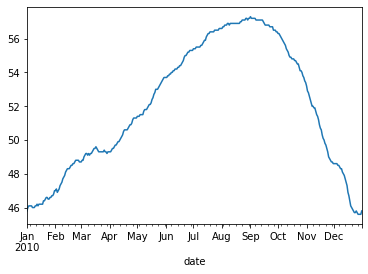

In [18]:
# taking the daily min temp and plotting it
df.temp.resample('D').min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

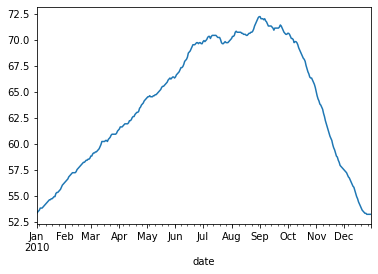

In [19]:
# finding the daily max temp and over time and plotting
df.temp.resample('D').max().plot()

4. Which month is the coldest, on average?

In [20]:
# here I resample by month average and find the min average month 
# temp
df.temp.resample('M').mean().idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

In [21]:
# This tells us January is the coldest on average

5. Which month has the highest average temperature?

In [22]:
df.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [23]:
# This tells me September has the highest average temperature

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [24]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [25]:
# take the max and min temp of each day and store it in a var.
max_daily = df.temp.resample('D').max()
min_daily = df.temp.resample('D').min()

In [26]:
# make a df set to daily
daily_df = pd.DataFrame(min_daily)

In [27]:
daily_df['max_daily'] = max_daily

In [28]:
daily_df.head()

,temp,max_daily
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [29]:
daily_df = daily_df.rename(columns={'temp': 'min_daily'})

In [30]:
daily_df['dif_daily'] = daily_df.max_daily- daily_df.min_daily

In [31]:
daily_df

,min_daily,max_daily,dif_daily
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [32]:
daily_df['monthly'] = daily_df.dif_daily.resample('M').mean()

In [33]:
daily_df.head()

,min_daily,max_daily,dif_daily,monthly
date,,,,
2010-01-01,45.8,53.3,7.5,NaN
2010-01-02,46.0,53.4,7.4,NaN
2010-01-03,46.1,53.5,7.4,NaN
2010-01-04,46.1,53.6,7.5,NaN
2010-01-05,46.1,53.8,7.7,NaN


In [34]:
# here I sort the the variance in monthly temp variance and order by 
# highest value indicating September has the highest
daily_df.monthly.sort_values(ascending = False)

date
2010-09-30    14.403333
2010-07-31    13.977419
2010-06-30    13.950000
2010-08-31    13.870968
2010-10-31    13.432258
                ...    
2010-12-26          NaN
2010-12-27          NaN
2010-12-28          NaN
2010-12-29          NaN
2010-12-30          NaN
Name: monthly, Length: 365, dtype: float64

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [35]:
min_daily = df.temp.resample('D').min()
daily_df['average_temp_daily'] = ((daily_df.max_daily)+(daily_df.min_daily))/2

In [36]:
daily_df.head()

,min_daily,max_daily,dif_daily,monthly,average_temp_daily
date,,,,,
2010-01-01,45.8,53.3,7.5,NaN,49.55
2010-01-02,46.0,53.4,7.4,NaN,49.70
2010-01-03,46.1,53.5,7.4,NaN,49.80
2010-01-04,46.1,53.6,7.5,NaN,49.85
2010-01-05,46.1,53.8,7.7,NaN,49.95


<AxesSubplot:xlabel='date'>

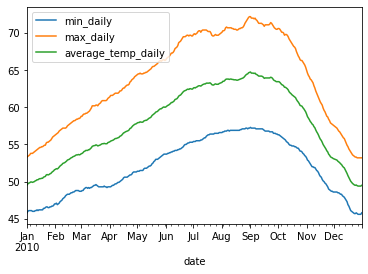

In [37]:
daily_df.drop(columns=['monthly','dif_daily']).plot()

In [38]:
from vega_datasets import data
df = data.seattle_weather()

In [39]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Which year and month combination has the highest amount of precipitation?

In [40]:
# so this df is by day so first thing i need to do is resample
# so set the date as index so we can resample by month
df = df.set_index('date').sort_index()
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [41]:
# now we can resample by precipitation by month
df_monthly = df.precipitation.resample('M').max().sort_values(ascending = False)

In [42]:
# the answer is March 2015

Visualize the amount of monthly precipitation over time.

In [43]:
df_monthly = pd.DataFrame(df_monthly)

<AxesSubplot:xlabel='date'>

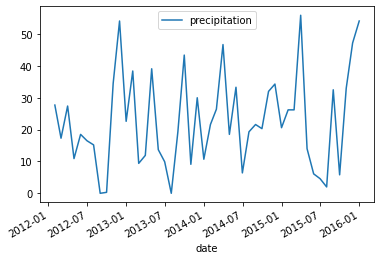

In [44]:
df_monthly.plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

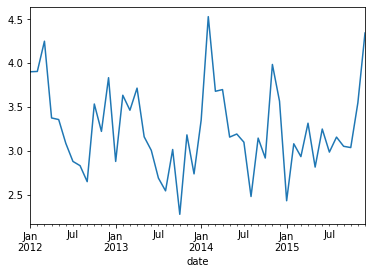

In [45]:
df['avg_wind_monthly'] = df.wind.resample('M').mean().plot()

Which year-month combination is the windiest?

In [46]:
# find max wind month/year
df.wind.resample('M').max().sort_values(ascending = False)

date
2012-12-31    9.5
2014-01-31    8.8
2013-12-31    8.8
2012-01-31    8.2
2013-02-28    8.1
2012-02-29    8.1
2015-11-30    8.0
2012-04-30    8.0
2014-02-28    7.9
2013-11-30    7.9
2014-11-30    7.7
2013-03-31    7.6
2015-12-31    7.6
2013-01-31    7.3
2012-10-31    7.3
2015-10-31    7.2
2013-09-30    7.1
2012-03-31    7.0
2015-09-30    6.8
2014-12-31    6.7
2015-01-31    6.6
2015-02-28    6.6
2015-04-30    6.5
2013-05-31    6.5
2014-09-30    6.5
2012-06-30    6.4
2012-05-31    6.4
2013-04-30    6.4
2013-10-31    6.3
2014-03-31    6.2
2012-11-30    6.0
2012-07-31    6.0
2015-08-31    5.8
2014-04-30    5.8
2013-06-30    5.7
2015-03-31    5.7
2014-05-31    5.6
2012-09-30    5.6
2014-10-31    5.4
2014-07-31    5.4
2015-05-31    5.2
2015-06-30    5.0
2014-06-30    5.0
2012-08-31    4.7
2013-08-31    4.6
2013-07-31    4.6
2015-07-31    4.3
2014-08-31    4.1
Name: wind, dtype: float64

In [47]:
# windiest month/year Dec 2012

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [48]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,avg_wind_monthly
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,"AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-02,10.9,10.6,2.8,4.5,rain,"AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-03,0.8,11.7,7.2,2.3,rain,"AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-04,20.3,12.2,5.6,4.7,rain,"AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-05,1.3,8.9,2.8,6.1,rain,"AxesSubplot(0.125,0.125;0.775x0.755)"


In [49]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun,"avg_wind_monthly_AxesSubplot(0.125,0.125;0.775x0.755)"
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0,1
2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0,1
2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0,1
2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0,1
2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0,1


In [50]:
df_dummy.weather_sun.resample('Y').sum().sort_values(ascending = False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: weather_sun, dtype: uint8

In [51]:
# the sunniest year was 2014 

In which month does it rain the most?

In [52]:
df_dummy.weather_rain.resample('M').sum().sort_values(ascending = False)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
2012-06-30    19
2013-03-31    18
2012-01-31    18
2012-10-31    17
2012-02-29    17
2013-01-31    16
2012-05-31    16
2012-07-31    12
2012-09-30     4
2012-08-31     2
2015-08-31     2
2013-10-31     1
2014-08-31     1
2014-07-31     1
2015-01-31     1
2015-04-30     1
2014-10-31     1
2013-08-31     1
2013-07-31     1
2015-10-31     1
2015-07-31     0
2015-06-30     0
2015-05-31     0
2015-03-31     0
2015-02-28     0
2014-11-30     0
2015-11-30     0
2014-12-31     0
2015-09-30     0
2014-01-31     0
2014-09-30     0
2014-06-30     0
2014-05-31     0
2014-04-30     0
2014-03-31     0
2014-02-28     0
2013-12-31     0
2013-11-30     0
2013-09-30     0
2013-06-30     0
2013-05-31     0
2013-04-30     0
2015-12-31     0
Name: weather_rain, dtype: uint8

In [53]:
# the rainiest month was November of 2012

Which month has the most number of days with a non-zero amount of precipitation?

In [54]:
df['has_precip'] = df['precipitation']!= 0

In [55]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,avg_wind_monthly,has_precip
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,"AxesSubplot(0.125,0.125;0.775x0.755)",False
2012-01-02,10.9,10.6,2.8,4.5,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True
2012-01-03,0.8,11.7,7.2,2.3,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True
2012-01-04,20.3,12.2,5.6,4.7,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True
2012-01-05,1.3,8.9,2.8,6.1,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True


In [56]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,avg_wind_monthly,has_precip
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,"AxesSubplot(0.125,0.125;0.775x0.755)",False
2012-01-02,10.9,10.6,2.8,4.5,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True
2012-01-03,0.8,11.7,7.2,2.3,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True
2012-01-04,20.3,12.2,5.6,4.7,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True
2012-01-05,1.3,8.9,2.8,6.1,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True


In [57]:
df['rained'] = df['precipitation']!= 0

In [58]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,avg_wind_monthly,has_precip,rained
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,"AxesSubplot(0.125,0.125;0.775x0.755)",False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True,True
2012-01-03,0.8,11.7,7.2,2.3,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True,True
2012-01-04,20.3,12.2,5.6,4.7,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True,True
2012-01-05,1.3,8.9,2.8,6.1,rain,"AxesSubplot(0.125,0.125;0.775x0.755)",True,True


In [59]:
df.rained.resample('M').sum().sort_values(ascending = False)

date
2012-12-31    27
2015-12-31    25
2012-01-31    22
2012-03-31    22
2015-11-30    20
2014-03-31    20
2012-11-30    20
2014-02-28    19
2014-10-31    19
2012-02-29    19
2013-02-28    18
2015-02-28    17
2012-04-30    17
2013-01-31    17
2013-04-30    16
2015-03-31    16
2012-10-31    16
2014-11-30    16
2013-03-31    15
2013-11-30    15
2014-12-31    15
2012-06-30    14
2015-10-31    14
2013-09-30    14
2015-01-31    14
2013-12-31    14
2015-04-30    13
2014-01-31    13
2014-04-30    13
2013-05-31    12
2013-10-31    12
2013-06-30    10
2012-05-31    10
2013-08-31     9
2014-06-30     9
2014-09-30     9
2015-09-30     9
2014-05-31     8
2012-07-31     7
2014-08-31     7
2015-08-31     6
2015-05-31     4
2015-06-30     4
2012-09-30     3
2015-07-31     2
2014-07-31     2
2013-07-31     0
2012-08-31     0
Name: rained, dtype: int64

In [60]:
# the most number of days with a non-zero amount of precipitation
# was Dec 2012

In [61]:
df = data.flights_20k()

In [62]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


Convert any negative delays to 0.

In [64]:
df.delay= np.where(df.delay < 0, 0, df.delay)

In [65]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


Does the day of the week make a difference in the delay amount?

In [71]:

df.groupby(df.date.dt.hour).delay.mean().sort_values()

date
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
14     10.747320
13     11.453311
15     13.137592
17     13.199580
16     13.881068
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [72]:
df.groupby(df.date.dt.day_name()).delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

In [ ]:
# so yes the day of the week does effect the amount of delay

Does the month make a difference in the delay amount?

In [74]:
df.groupby(df.date.dt.month).delay.mean()

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64